In [4]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/video-game-sales-analyze/vgsales new.csv'
df = pd.read_csv(file_path)

# Display the first few rows to verify the data
df.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


## Check for Missing Values

In [5]:
# Check for missing values in the dataset
df.isnull().sum()


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
# Fill missing Year with the most frequent year (mode)
df['Year'].fillna(df['Year'].mode()[0], inplace=True)


<ipython-input-6-5e4569067a2b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Year'].fillna(df['Year'].mode()[0], inplace=True)


In [7]:
# Fill missing Publisher with 'Unknown'
df['Publisher'].fillna('Unknown', inplace=True)


<ipython-input-7-5534e4d55ba9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Publisher'].fillna('Unknown', inplace=True)


### Top 10 Games by Global Sales

In [8]:
# Top 10 games by Global Sales
top_10_games = df.groupby('Name')['Global_Sales'].sum().reset_index()
top_10_games = top_10_games.sort_values(by='Global_Sales', ascending=False).head(10)

# Display the top 10 games
top_10_games


,Name,Global_Sales
11007,Wii Sports,82.74
3712,Grand Theft Auto V,55.92
9327,Super Mario Bros.,45.31
9715,Tetris,35.84
5573,Mario Kart Wii,35.82
11009,Wii Sports Resort,33.00
7346,Pokemon Red/Pokemon Blue,31.37
1222,Call of Duty: Black Ops,31.03
1228,Call of Duty: Modern Warfare 3,30.83
6723,New Super Mario Bros.,30.01


### Top Platforms by Total Global Sales

In [15]:
# Top platforms by Global Sales
top_platforms = df.groupby('Platform')['Global_Sales'].sum().reset_index()
top_platforms = top_platforms.sort_values(by='Global_Sales', ascending=False).head(10)

# Display the top platforms
top_platforms



,Platform,Global_Sales
16,PS2,1255.64
28,X360,979.96
17,PS3,957.84
26,Wii,926.71
4,DS,822.49
15,PS,730.66
6,GBA,318.50
19,PSP,296.28
18,PS4,278.10
13,PC,258.82


### Global Sales by Genre

In [10]:
# Global sales by Genre
genre_sales = df.groupby('Genre')['Global_Sales'].sum().reset_index()

# Display the sales by genre
genre_sales = genre_sales.sort_values(by='Global_Sales', ascending=False)
genre_sales


,Genre,Global_Sales
0,Action,1751.18
10,Sports,1330.93
8,Shooter,1037.37
7,Role-Playing,927.37
4,Platform,831.37
3,Misc,809.96
6,Racing,732.04
2,Fighting,448.91
9,Simulation,392.20
5,Puzzle,244.95


### Sales Trends Over the Years

In [11]:
# Sales trend over the years
sales_by_year = df.groupby('Year')['Global_Sales'].sum().reset_index()

# Display the sales trend
sales_by_year


,Year,Global_Sales
0,1980.0,11.38
1,1981.0,35.77
2,1982.0,28.86
3,1983.0,16.79
4,1984.0,50.36
5,1985.0,53.94
6,1986.0,37.07
7,1987.0,21.74
8,1988.0,47.22
9,1989.0,73.45


### Sales by Region

In [12]:
# Sales by region
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()
region_sales.columns = ['Region', 'Sales']

# Display the sales by region
region_sales

,Region,Sales
0,NA_Sales,4392.95
1,EU_Sales,2434.13
2,JP_Sales,1291.02
3,Other_Sales,797.75


## Visualizations

### Top 10 Games by Global Sales

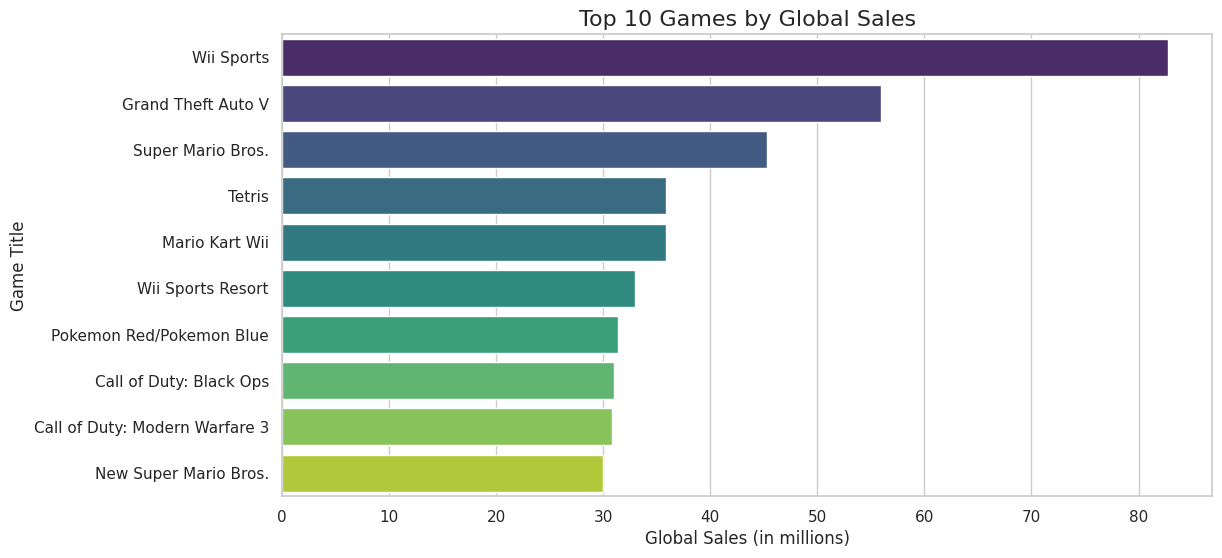

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot style
sns.set(style="whitegrid")

# Create a bar plot for the top 10 games by global sales
plt.figure(figsize=(12, 6))
sns.barplot(x='Global_Sales', y='Name', data=top_10_games, palette='viridis')

# Add labels and title
plt.title('Top 10 Games by Global Sales', fontsize=16)
plt.xlabel('Global Sales (in millions)', fontsize=12)
plt.ylabel('Game Title', fontsize=12)
plt.show()

### Top Platforms by Total Global Sales

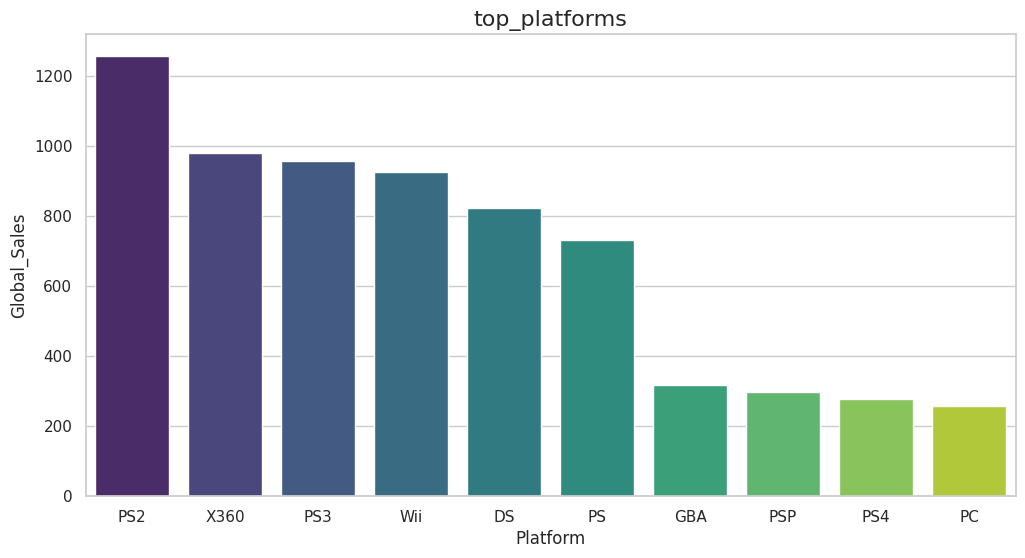

In [26]:
# Set up the plot style
sns.set(style="whitegrid")

# Create a bar plot 
plt.figure(figsize=(12, 6))
sns.barplot(x='Platform', y='Global_Sales', data=top_platforms, palette='viridis')

# Add labels and title
plt.title('top_platforms', fontsize=16)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Global_Sales', fontsize=12)
plt.show()

### Global Sales by Genre

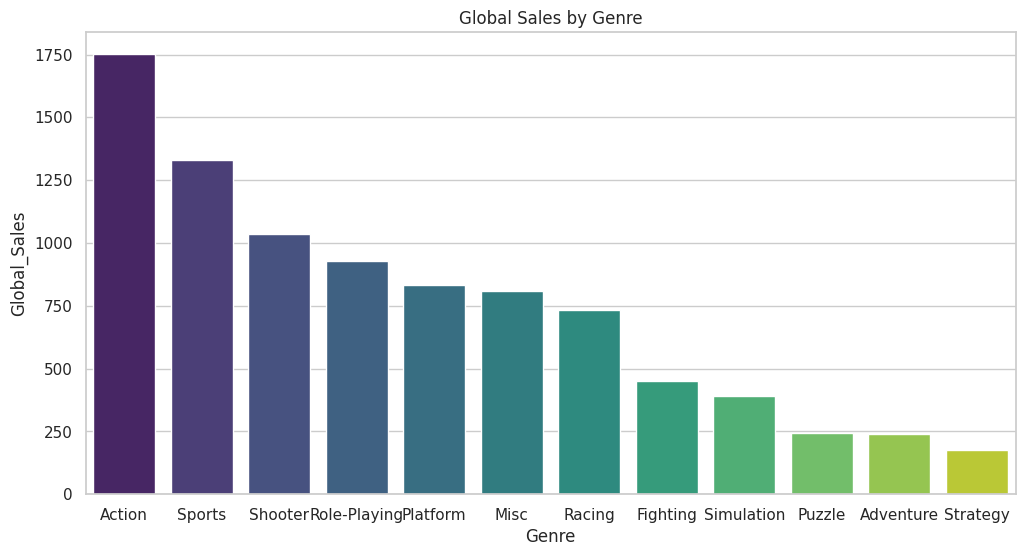

In [25]:
# Set up the plot style
sns.set(style="whitegrid")

# Create a bar plot 
plt.figure(figsize=(12, 6))
sns.barplot(x='Genre', y='Global_Sales', data=genre_sales, palette='viridis')

# Add labels and title
plt.title('Global Sales by Genre', fontsize=12)
plt.ylabel('Global_Sales', fontsize=12)
plt.show()

### Sales Trends Over the Years

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


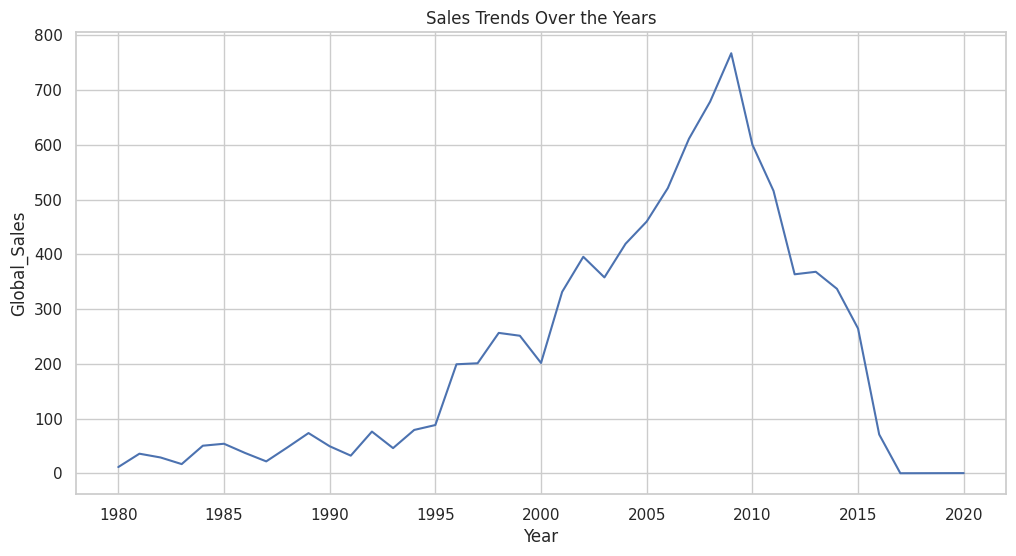

In [24]:
# Set up the plot style
sns.set(style="whitegrid")

# Create a line plot 
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Global_Sales', data=sales_by_year)

# Add labels and title
plt.title('Sales Trends Over the Years', fontsize=12)
plt.ylabel('Global_Sales', fontsize=12)
plt.show()

### Sales by Region

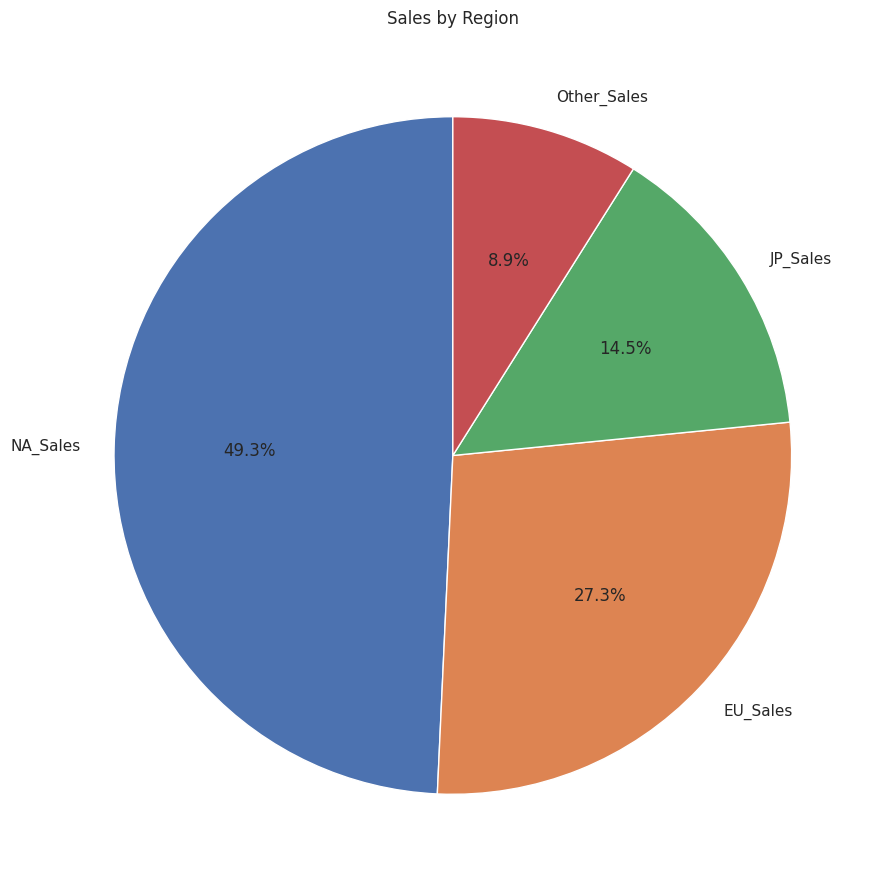

In [40]:
import matplotlib.pyplot as plt

# Group sales data by region and calculate total sales for each region
sales_by_region = region_sales.groupby('Region')['Sales'].sum()

# Sort the sales in descending order and select the top 10 regions
top_regions = sales_by_region.sort_values(ascending=False).head(10)

# Plot a pie chart
top_regions.plot(
    kind='pie',
    figsize=(1, 11),
    autopct='%1.1f%%',  # Display percentages
    startangle=90,  # Start from 90 degrees
    title='Sales by Region',  # Add a title
    ylabel=''  # Remove the y-axis label for cleaner appearance
)

plt.show()


### Summary

#### Best-Selling Games, Platforms and Genres 

##### Best-Selling Game

Wii Sports
Global Impact: Wii Sports leads as the top-selling game globally, largely due to its bundling with the Wii console and its appeal to casual gamers across all age groups.
Key Factors for Success:
Bundling with the Wii console contributed significantly to its sales.
Simple, motion-based gameplay made it accessible and popular among non-traditional gamers.
Regional Trends: It performed exceptionally well in North America and Europe, regions where the Wii console was highly popular.

Key Insights
Wii Sports showcases the impact of innovative gameplay and console bundling strategies. Such tactics can boost sales dramatically, especially in casual gaming markets.
The PS2’s success highlights the importance of platform versatility, exclusive titles, and affordability in driving console sales.
Action games dominate due to their universal appeal and consistent innovation, making them a safe and lucrative investment for developers and publishers.

##### Best-Selling Platform

PlayStation 2 (PS2)

Dominance: The PS2 remains the best-selling gaming platform in history, with its massive library of games, backward compatibility, and role as a DVD player in the early 2000s.
Key Factors for Success:
Huge variety of exclusive and third-party titles.
Long lifecycle and wide adoption globally.
Strong support from publishers and developers.
Regional Trends: PS2 had strong sales across all major regions, including North America, Europe, and Japan, reflecting its global appeal.

##### Best-Selling Genre

Action

Popularity: 
Action games dominate global sales due to their engaging gameplay, immersive storylines, and appeal to a broad audience.
Key Factors for Success:
Action games are often at the forefront of technological advancements (e.g., graphics, gameplay mechanics).
Franchises like Grand Theft Auto, Assassin’s Creed, and Call of Duty contribute significantly to the genre’s success.
Regional Trends: The Action genre consistently ranks high across all regions, especially in North America and Europe, where blockbuster franchises thrive.

#### Video Game Sales Over the Years

##### Trend Analysis

1. 1980s – Early Growth

The video game industry began its rise in the 1980s with the emergence of consoles like the NES (Nintendo Entertainment System) and popular arcade games.
Sales were moderate as the industry established itself.

2. 1990s – Steady Rise:

The 1990s saw significant growth with the introduction of new platforms like the Sony PlayStation, Nintendo 64, and Sega Genesis.
Blockbuster games and technological advancements in 3D graphics fueled steady increases in sales.

3. 2000–2009 – Peak Era:

The period from 2000 to 2009 marked the golden age of video game sales.
Major contributors:
The release of consoles like PS2, Xbox, Wii, and handheld devices like the Nintendo DS.
Blockbuster titles and franchises (e.g., Grand Theft Auto, Halo, Call of Duty).
Expanding audiences, including casual gamers attracted by consoles like the Wii.

2009 Peak: Sales peaked around 2009, driven by the popularity of the PS3, Xbox 360, and Wii.

4. 2010–2020 – Decline:

After 2009, sales started to decline due to:

The rise of digital distribution replacing physical game sales (not fully reflected in traditional sales data).
Shift to mobile gaming and free-to-play models, especially in the 2010s.
Fewer console sales toward the end of the lifecycle for PS3 and Xbox 360 before PS4 and Xbox One gained traction.

2020 Decline: By 2020, physical game sales had nearly dropped to zero, with the industry shifting heavily to digital platforms.

### Sales by Region

#### 1. North America (49.3%)

Dominance: North America leads in video game sales, contributing nearly half of the global sales.

Key Factors:

- Strong adoption of home consoles like PlayStation, Xbox, and Wii.
- The popularity of action, sports, and shooter genres, especially franchises like Call of Duty, Madden NFL, and Grand Theft Auto.
- Early adoption of gaming as a mainstream entertainment medium.

Market Focus: Blockbuster titles, sports games, and FPS games perform exceptionally well in this region.

#### 2. Europe (27.3%)

Significant Share: Europe holds the second-largest market share, with over a quarter of global sales.

Key Factors:
- Diverse gaming preferences across countries. For instance, football (soccer) games like FIFA dominate many European markets.
- The widespread popularity of PlayStation and Nintendo consoles.

#### 3. Japan (14.5%)

Regional Specialization: Japan's gaming market has a unique identity, driven by RPGs, handheld gaming, and iconic franchises.

Key Factors:
- Domination of Nintendo and Sony consoles, along with a preference for portable gaming devices like the Nintendo DS and PSP.
- Popular franchises like Pokémon, Final Fantasy, and Monster Hunter drive regional sales.

Market Focus: Culturally specific genres like JRPGs, anime-inspired games, and portable gaming are highly successful.

#### 4. Other Regions (8.9%)

Emerging Markets: 
- This category includes regions like South America, Australia, Africa and parts of Asia (excluding Japan), which account for a smaller share but show growth potential.

Key Factors:
- Limited access to consoles and infrastructure in some areas during earlier years.
- Growth in mobile and PC gaming in these regions as infrastructure improves.

Market Focus: Affordable platforms like mobile gaming and genres with universal appeal, such as racing and casual games, perform well.

## Key Insights

#### Best-Selling Games, Platforms and Genres

Wii Sports showcases the impact of innovative gameplay and console bundling strategies. Such tactics can boost sales dramatically, especially in casual gaming markets.
The PS2’s success highlights the importance of platform versatility, exclusive titles, and affordability in driving console sales.
Action games dominate due to their universal appeal and consistent innovation, making them a safe and lucrative investment for developers and publishers.

#### Video Game Sales Over the Years

2009 Peak: The peak highlights the height of physical game sales, driven by a mix of popular consoles and games, expanding gaming demographics, and innovations in motion gaming (e.g., Wii).

Digital Transition: The decline after 2009 reflects the industry's evolution toward digital distribution, streaming services, and mobile gaming, which are not well-captured in traditional sales data.

Future Outlook: The trend emphasizes the need for developers and publishers to adapt to digital-first models and explore new technologies like virtual reality and cloud gaming.

#### Sales by Region

- North America and Europe dominate the global gaming market, accounting for over 75% of total sales, with culturally distinct preferences influencing game performance.
- Japan, while smaller in total share, plays a critical role in shaping the industry through innovative console designs and iconic franchises.
- Other regions represent a growing opportunity, especially with the rise of mobile and online gaming.